<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/EunjuKang/project_02/Drug_discrimination_230111_commit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project02. 경구약물분류

In [ ]:
# 오늘 목표: 파일 업로드 및 불러오기 + 데이터 모양 확인하기

##1. 데이터 탐색

In [ ]:
# 파일 압축 풀기

# 원천 데이터: .png

# %cd /content/drive/MyDrive/Drugs/Data/img_data/img_data_drug
# !unzip -qq "/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/drugs_img.zip"

# 라벨링 데이터: .json
# %cd /content/drive/MyDrive/Drugs/Data/label_data/label_data_drug
# !unzip -qq "/content/drive/MyDrive/Drugs/Data/label_data/label_data_drug/drugs_label.zip"


/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug


In [ ]:
# 이미지 파일 bbox 기준으로 자르기

In [23]:
import PIL as pil
from PIL import Image
import glob 
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import json
import numpy as np

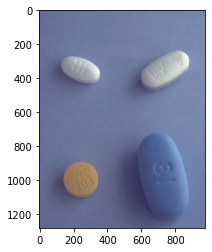

In [14]:
test_img = Image.open('/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-016235-027733-029667-031885/K-016235-027733-029667-031885_0_2_0_2_70_000_200.png')

plt.imshow(test_img)
plt.show()

In [1]:
# import urllib.request

# url = "http://connectdi.com/design/img/drug/151369795248800082.jpg"    # <- 여기에 json에서의 url 넣으시면되고

# savelocation = "/content/drive/MyDrive/test_url/pic.jpg"   # <- 저장할 경로/ 맨 뒤에는 어떤 이름으로 저장할지 
# urllib.request.urlretrieve(url, savelocation) #해당 url에서 이미지를 다운로드 메소드

('/content/drive/MyDrive/test_url/pic.jpg',
 <http.client.HTTPMessage at 0x7f1a9d4b0640>)

In [11]:
#해당하는 json 파일 불러오기

#/content/drive/MyDrive/Drugs/Data/label_data/label_data_drug/K-016235-027733-029667-031885_json/K-016235/K-016235-027733-029667-031885_0_2_0_2_70_000_200.json


file_path = "/content/drive/MyDrive/Drugs/Data/label_data/label_data_drug/K-016235-027733-029667-031885_json/K-016235/K-016235-027733-029667-031885_0_2_0_2_70_000_200.json"

with open(file_path, 'r') as file:
    data = json.load(file)
    #print(type(data))
    print(data['annotations'][0]['bbox'])
   
    #print(type(data['annotations'][0]))
    #print(data['annotations']{'bbox'}) #annotations[].bbox


[116, 264, 252, 179]


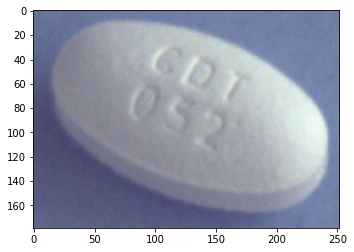

In [27]:
x= 116
y= 264
w= 252
h= 179

cropped_img = test_img.crop((x, y, x+w, y+h))
plt.imshow(cropped_img)
plt.show()

In [ ]:
# glob으로 파일명 불러오기

In [41]:
# 폴더 갯수 확인

import os

file_list = os.listdir('/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug')
print(file_list[:10])
print(len(file_list))

['K-019232-020238-028424', 'K-018357-033026-038162', 'K-018357-033026-036637', 'K-018357-028424-038162', 'K-018357-033026-035206', 'K-019232-020238-020852', 'K-018357-028424-036637', 'K-018357-028424-035206', 'K-019232-020238-033026', 'K-019232-020238-024752']
501


In [24]:
import glob

img_dir_path = '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug'
img_path_list = glob.glob(img_dir_path + '/*/*.png', recursive=True)

In [25]:
print(img_path_list)
print(len(img_path_list))

['/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-019232-020238-028424/K-019232-020238-028424_index.png', '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-019232-020238-028424/K-019232-020238-028424_0_2_0_2_75_000_200.png', '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-019232-020238-028424/K-019232-020238-028424_0_2_0_2_70_000_200.png', '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-019232-020238-028424/K-019232-020238-028424_0_2_0_2_90_000_200.png', '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-018357-033026-038162/K-018357-033026-038162_0_2_0_2_70_000_200.png', '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-018357-033026-038162/K-018357-033026-038162_0_2_0_2_75_000_200.png', '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-018357-033026-038162/K-018357-033026-038162_index.png', '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-018357-033026-038162/K-018357-033026-038162_0_2_0_2_90_000_200

In [26]:
idx_path_list = []

def rmv_idx_img(img_path):
  code_list = img_path.split('/')
  code_list = code_list[9]
  if 'index' in code_list:
    idx_path_list.append(img_path)

for i in range(len(img_path_list)):
  rmv_idx_img(img_path_list[i])

print(len(idx_path_list))

500


In [27]:
for img_name in idx_path_list:
  img_path_list.remove(img_name)


print(img_path_list)
print(len(img_path_list))

['/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-019232-020238-028424/K-019232-020238-028424_0_2_0_2_75_000_200.png', '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-019232-020238-028424/K-019232-020238-028424_0_2_0_2_70_000_200.png', '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-019232-020238-028424/K-019232-020238-028424_0_2_0_2_90_000_200.png', '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-018357-033026-038162/K-018357-033026-038162_0_2_0_2_70_000_200.png', '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-018357-033026-038162/K-018357-033026-038162_0_2_0_2_75_000_200.png', '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-018357-033026-038162/K-018357-033026-038162_0_2_0_2_90_000_200.png', '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-018357-033026-036637/K-018357-033026-036637_0_2_0_2_75_000_200.png', '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-018357-033026-036637/K-018357-033026

In [ ]:
#인덱스 이미지 제거 완료
#img_path_list : 모든 이미지 파일의 경로가 list로 담겨있음

In [28]:
def img_file_name (path):
  img_name = path.split('/')
  img_name = img_name[9]
  img_name = img_name.split('.')
  img_name = img_name[0]
  return img_name # ex) K-019232-020238-028424_0_2_0_2_75_000_200

In [29]:
path = '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-019232-020238-028424/K-019232-020238-028424_0_2_0_2_75_000_200.png'
img = img_file_name(path)
print(img)

K-019232-020238-028424_0_2_0_2_75_000_200


In [30]:
def group_list (path):
  code_list = path.split('/')
  code_list = code_list[8]
  code_list = code_list.split('-')
  code_list = code_list[1:]
  return code_list # ex) ['019232', '020238', '028424']

In [31]:
path = '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-019232-020238-028424/K-019232-020238-028424_0_2_0_2_75_000_200.png'
img_code_list = group_list(path)
print(img_code_list)

['019232', '020238', '028424']


In [32]:
def drug_group (path):
  path_split = path.split('/')
  group = path_split[8]
  return group # ex) K-019232-020238-028424

In [33]:
path = '/content/drive/MyDrive/Drugs/Data/img_data/img_data_drug/K-019232-020238-028424/K-019232-020238-028424_0_2_0_2_75_000_200.png'
img_group_code = drug_group(path)
print(img_group_code)

K-019232-020238-028424


In [34]:
base_json_path = '/content/drive/MyDrive/Drugs/Data/label_data/label_data_drug'
def build_json_path(img_path):
  json_path_list = []
  code_list = group_list(img_path)
  for code in code_list:
    json_path = base_json_path + '/'+ drug_group(img_path)+'_json/'+'K-'+code+'/'+ img_file_name(img_path)+'.json'
    json_path_list.append(json_path)
  return json_path_list

In [35]:
json_path_list = build_json_path(path)
print(json_path_list)

['/content/drive/MyDrive/Drugs/Data/label_data/label_data_drug/K-019232-020238-028424_json/K-019232/K-019232-020238-028424_0_2_0_2_75_000_200.json', '/content/drive/MyDrive/Drugs/Data/label_data/label_data_drug/K-019232-020238-028424_json/K-020238/K-019232-020238-028424_0_2_0_2_75_000_200.json', '/content/drive/MyDrive/Drugs/Data/label_data/label_data_drug/K-019232-020238-028424_json/K-028424/K-019232-020238-028424_0_2_0_2_75_000_200.json']


In [40]:
# 이미지 경로를 이용해 json 파일에서 bbox 좌표 읽어오는 함수

def bbox_coordinate (img_path):
  coordinate_list = []
  json_path_list = build_json_path(img_path)
  for json_path in json_path_list:
    with open(json_path, 'r') as file:
      data = json.load(file)
      coordinate = data['annotations'][0]['bbox']
      coordinate_list.append(coordinate)
  return coordinate_list 

In [41]:
code_list =  group_list(path)
coordinate_list = bbox_coordinate(path)
print(code_list)
print(coordinate_list)

['019232', '020238', '028424']
[[94, 698, 342, 266], [595, 711, 231, 227], [336, 155, 241, 248]]


In [42]:
#이미지 경로를 전달하면 json 파일을 읽어와서 crop 하고 폴더에 정리하기

def crop_img(img_path):
  code_list =  group_list(path)
  coordinate_list = bbox_coordinate(img_path)
  img = Image.open(img_path)
  #plt.imshow(img)
  #plt.show()
  i = 0
  for code in code_list:
    coordinate = coordinate_list[i]
    i += 1
    x, y, w, h = coordinate
    cropped_img = img.crop((x, y, x+w, y+h))
    #plt.imshow(cropped_img)
    #plt.show()  

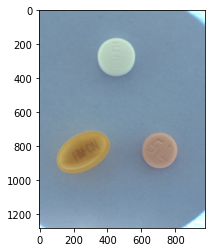

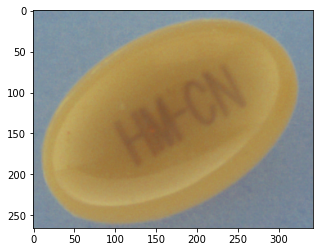

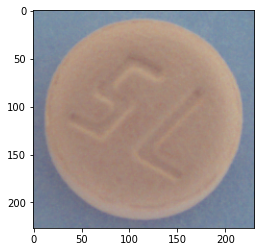

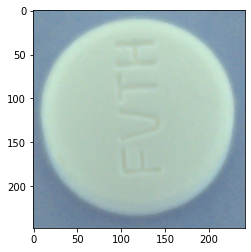

In [43]:
crop_img(path)